### 군집화

In [1]:
groundtruth = np.array([
    [1, 1, 1, 0, 0],
    [1, 1, 1, 0, 0],
    [1, 1, 1, 0, 0],
    [0, 0, 0, 1, 1],
    [0, 0, 0, 1, 1],
])

In [2]:
clustering = np.array([
    [1, 1, 0, 0, 0],
    [1, 1, 0, 0, 0],
    [0, 0, 1, 1, 1],
    [0, 0, 1, 1, 1],
    [0, 0, 1, 1, 1],
])

In [3]:
incidence = (groundtruth == clustering)  # 1*는 True/False를 숫자 0/1로 바꾸기 위한 계산 
incidence

array([[ True,  True, False,  True,  True],
       [ True,  True, False,  True,  True],
       [False, False,  True, False, False],
       [ True,  True, False,  True,  True],
       [ True,  True, False,  True,  True]])

In [4]:
incidence.sum()

17

In [5]:
incidence = 1 * (groundtruth == clustering)  # 1*는 True/False를 숫자 0/1로 바꾸기 위한 계산 
incidence

array([[1, 1, 0, 1, 1],
       [1, 1, 0, 1, 1],
       [0, 0, 1, 0, 0],
       [1, 1, 0, 1, 1],
       [1, 1, 0, 1, 1]])

연습문제 14.2.1

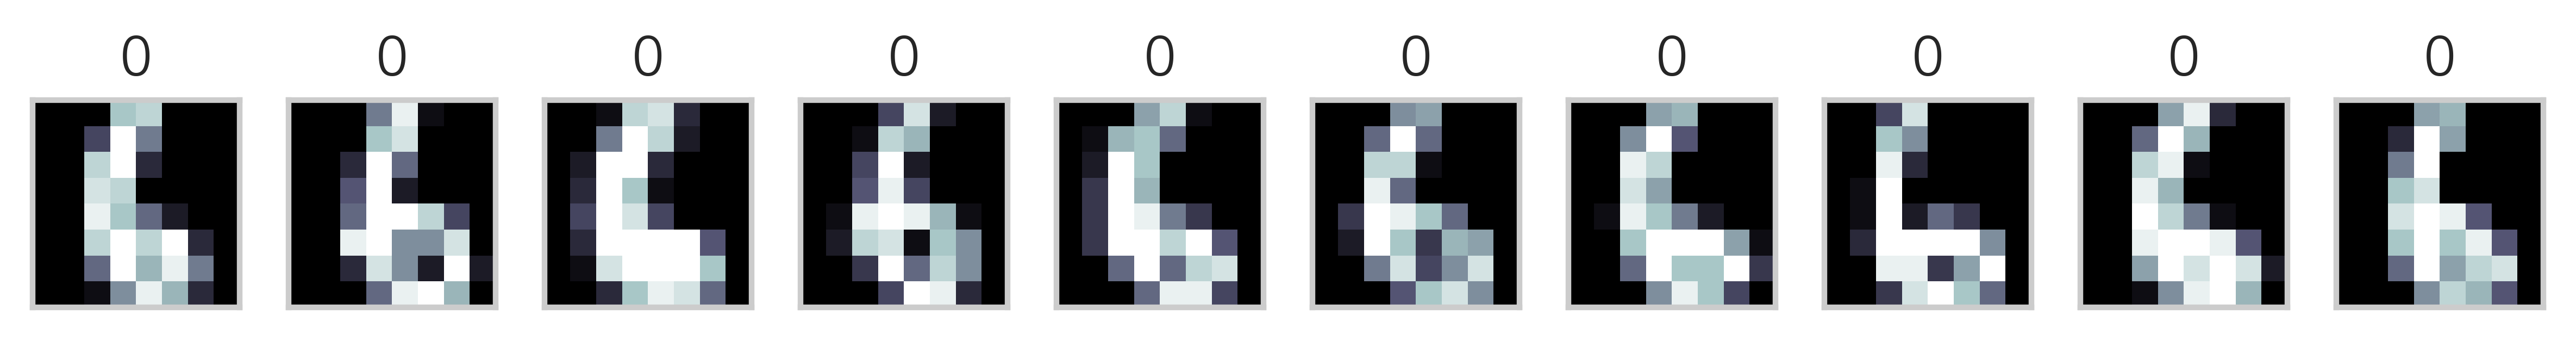

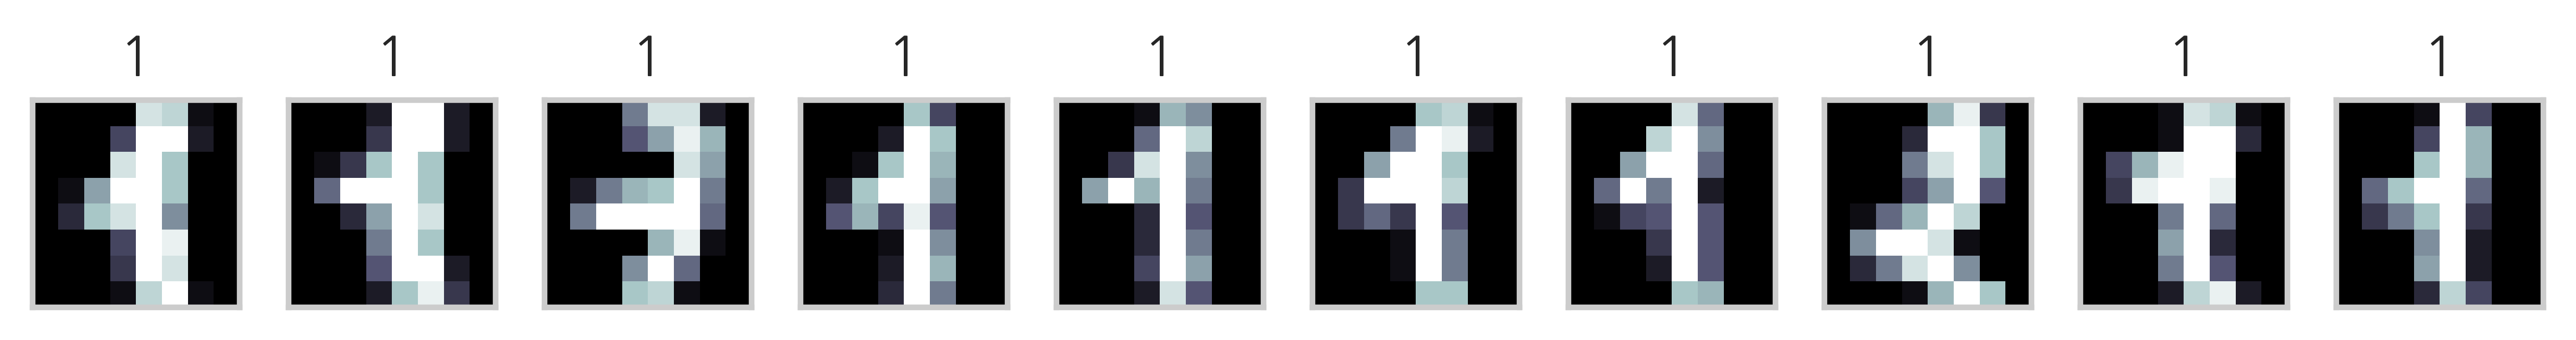

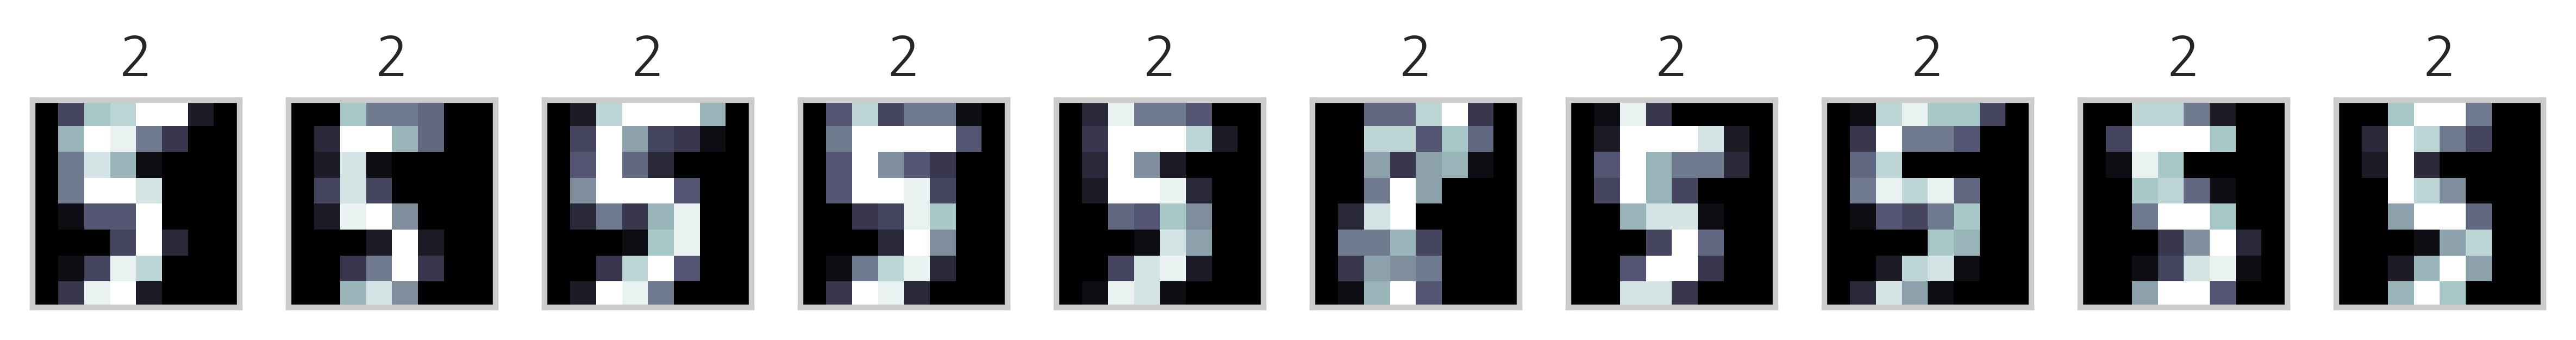

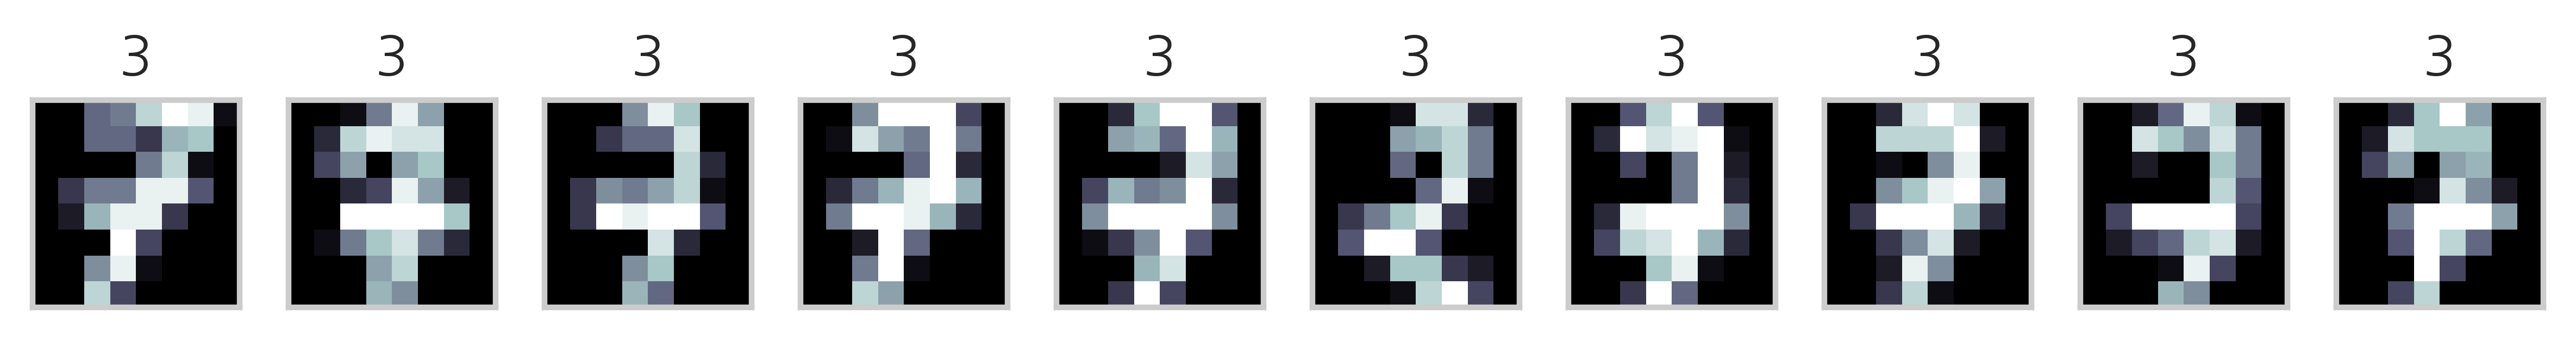

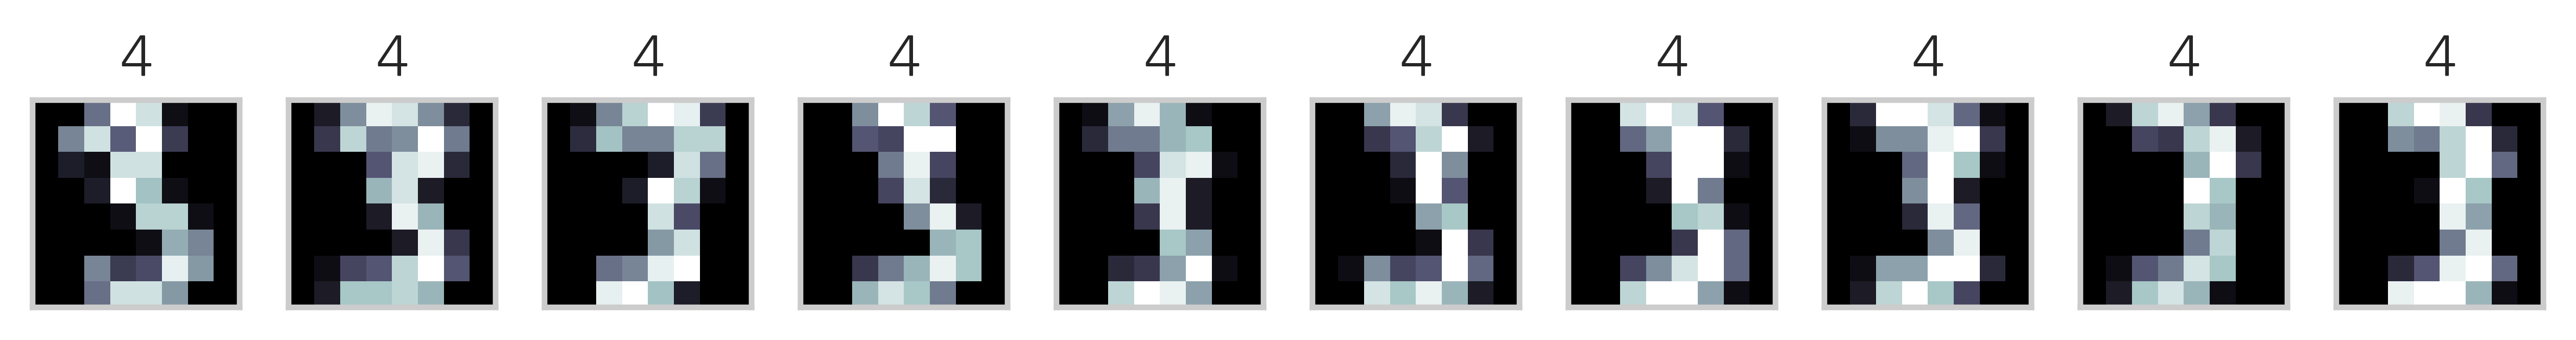

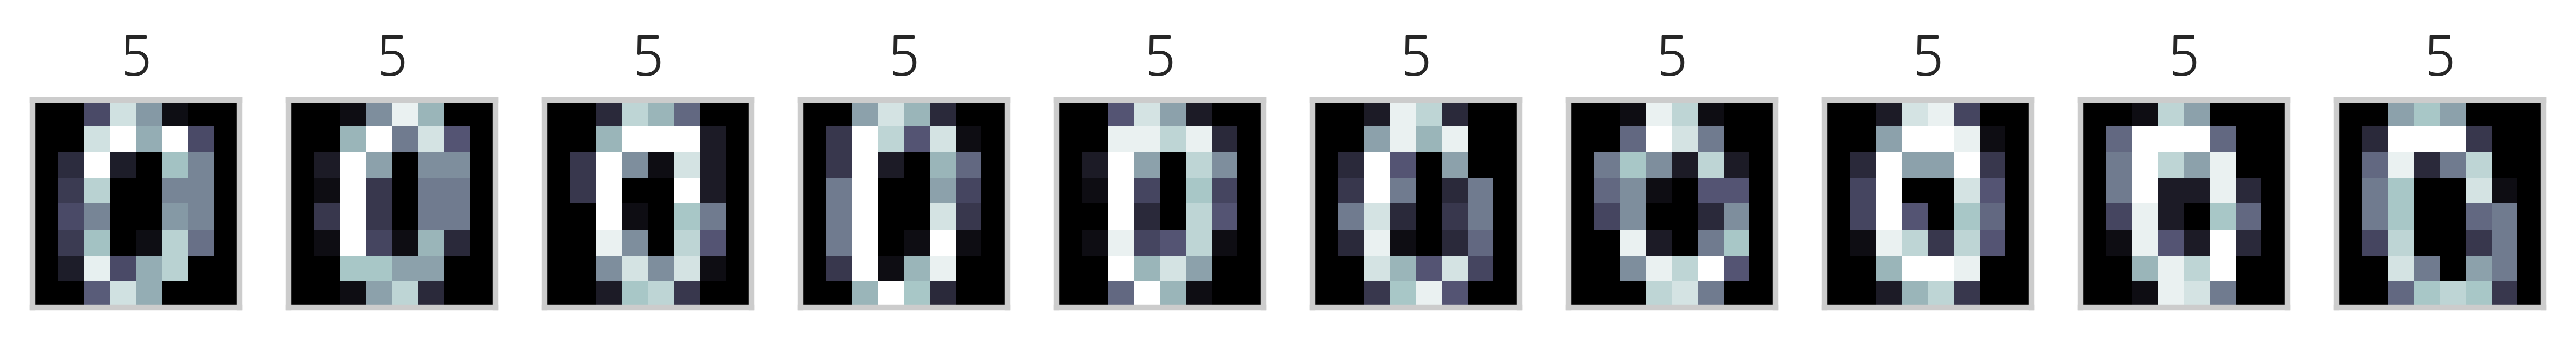

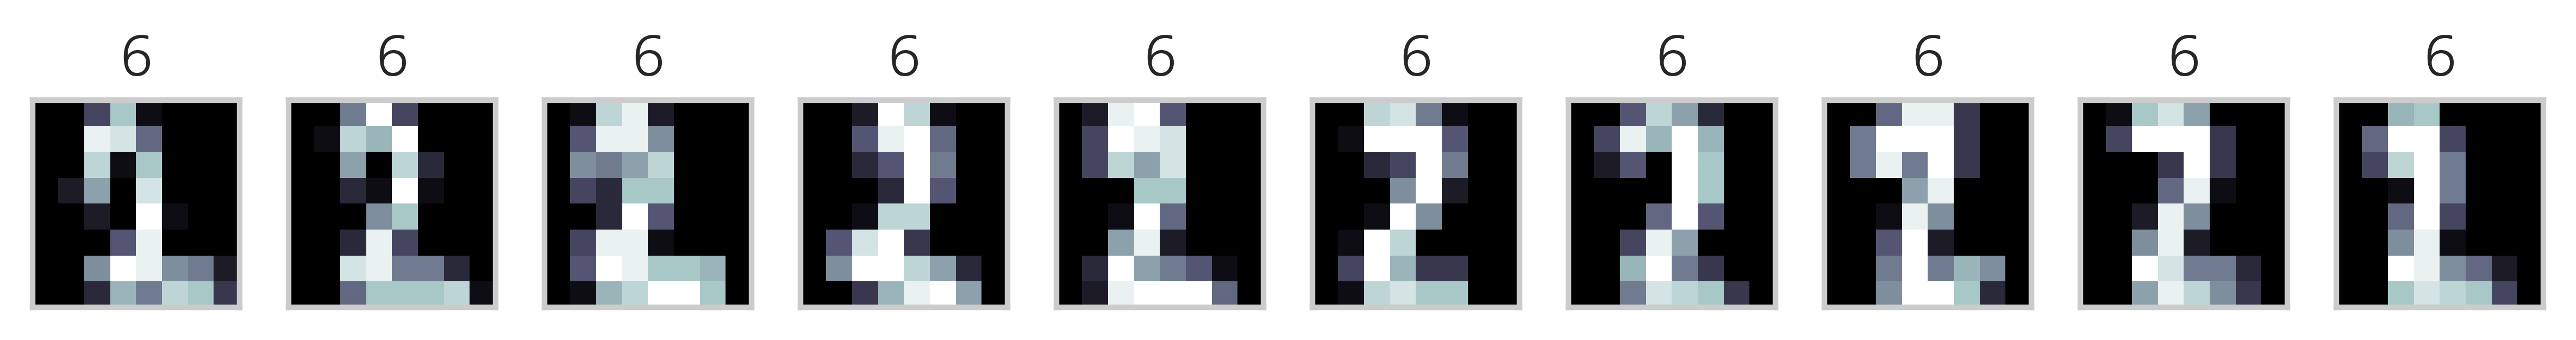

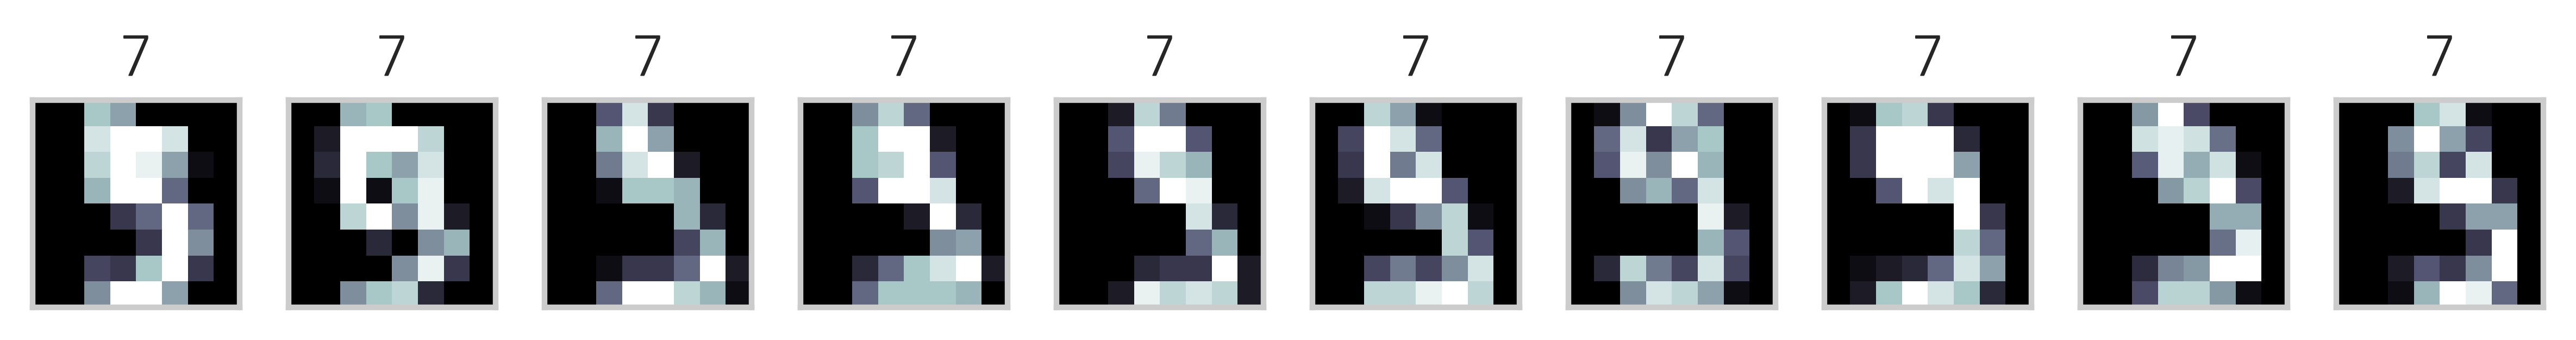

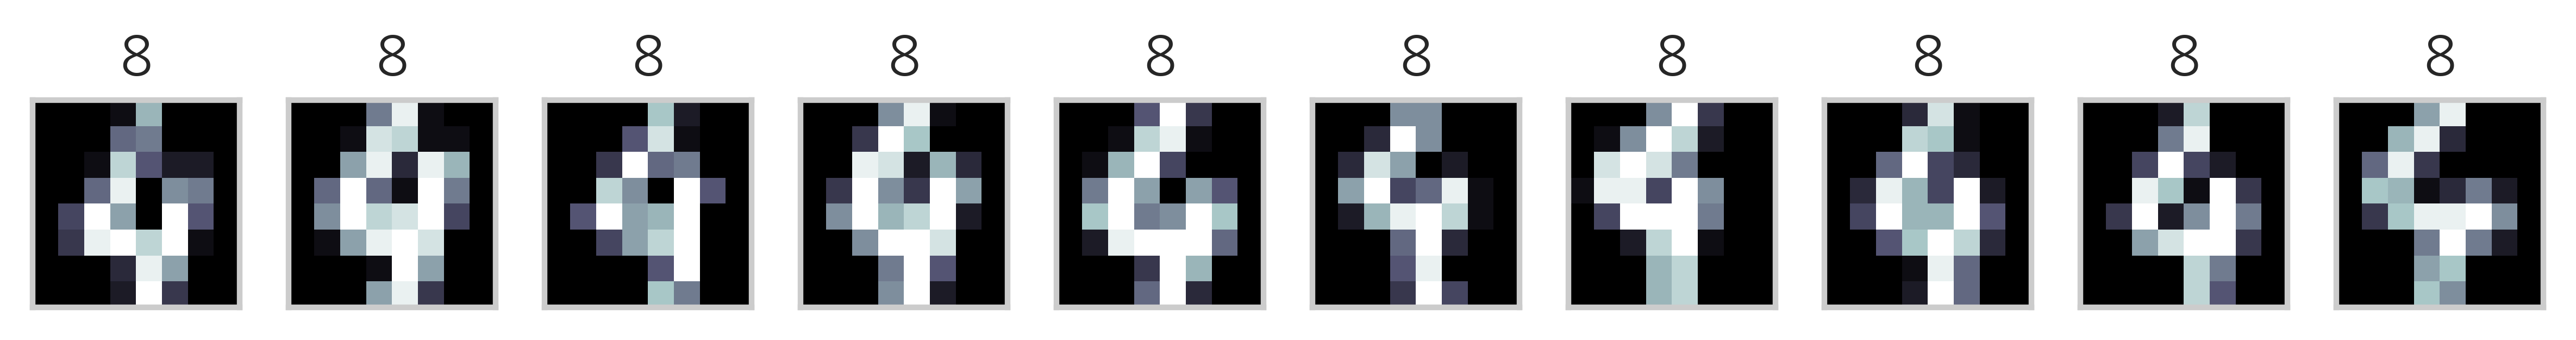

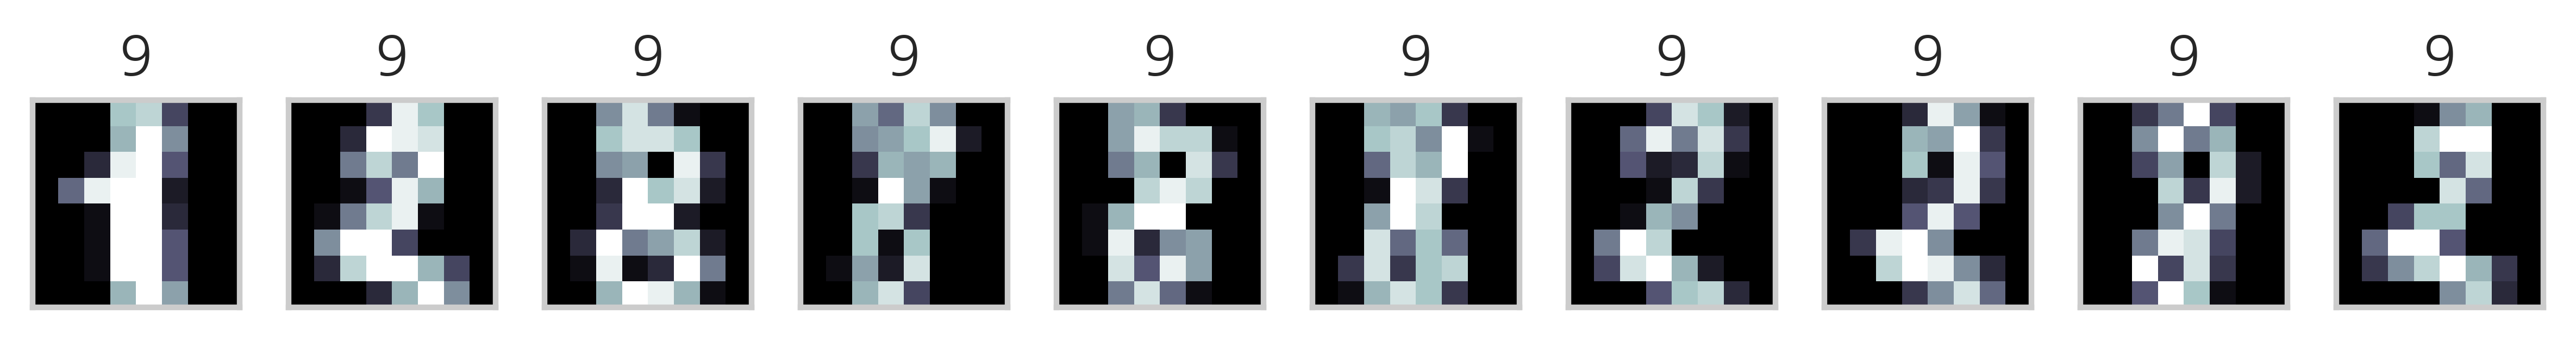

In [1]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
digits = load_digits()

# 10 차원으로 차원 축소
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
X = pca.fit_transform(digits.data)

model = KMeans(init="k-means++", n_clusters=10, random_state=0)
model.fit(X)
y_pred = model.labels_

def show_digits(images, labels):
    f = plt.figure(figsize=(8, 2))
    i = 0
    while (i < 10 and i < images.shape[0]):
        ax = f.add_subplot(1, 10, i + 1)
        ax.imshow(images[i], cmap=plt.cm.bone)
        ax.grid(False)
        ax.set_title(labels[i])
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.tight_layout()
        i += 1
        
def show_cluster(images, y_pred, cluster_number):
    images = images[y_pred == cluster_number]
    y_pred = y_pred[y_pred == cluster_number]
    show_digits(images, y_pred)
    

for i in range(10):
    show_cluster(digits.images, y_pred, i)

In [2]:
from sklearn.metrics import confusion_matrix

confusion_matrix(digits.target, y_pred)

array([[  0,   0,   0,   0,   0, 176,   0,   0,   2,   0],
       [  2,  55,   1,   0,   1,   0,  24,   0,   0,  99],
       [  0,   1,   0,   3,  10,   1, 151,   2,   0,   9],
       [  0,   0,   1,   7, 149,   0,   1,  19,   0,   6],
       [  0,   4,   0,  10,   0,   0,   0,   0, 164,   3],
       [  1,   0, 136,   0,   1,   0,   0,  42,   2,   0],
       [176,   0,   0,   0,   0,   1,   0,   0,   0,   4],
       [  0,   3,   4, 160,   0,   0,   0,   0,   1,  11],
       [  2,   9,  13,   5,   4,   0,   3,  47,   0,  91],
       [  0,  20,   7,   7,   4,   0,   0, 141,   0,   1]], dtype=int64)

In [4]:
from sklearn.metrics.cluster import adjusted_mutual_info_score, adjusted_rand_score, silhouette_score

print("ARI:", adjusted_rand_score(digits.target, y_pred))
print("AMI:", adjusted_mutual_info_score(digits.target, y_pred))
print("Silhouette Score:", silhouette_score(digits.data, y_pred))

ARI: 0.6430989042606677
AMI: 0.7148203279143654
Silhouette Score: 0.18069113956949404


In [ ]:
연습문제 14.2.2

In [5]:
from sklearn.datasets import load_iris
iris = load_iris()

X = iris.data
y = iris.target

model = KMeans(init="k-means++", n_clusters=3, random_state=0)
model.fit(X)
y_pred = model.labels_

In [6]:
from sklearn.metrics.cluster import adjusted_mutual_info_score, adjusted_rand_score, silhouette_score

print("ARI:", adjusted_rand_score(iris.target, y_pred))
print("AMI:", adjusted_mutual_info_score(iris.target, y_pred))
print("Silhouette Score:", silhouette_score(iris.data, y_pred))

ARI: 0.7302382722834697
AMI: 0.7483723933229485
Silhouette Score: 0.5528190123564091


In [7]:
from sklearn.metrics import confusion_matrix

confusion_matrix(iris.target, y_pred)

array([[ 0, 50,  0],
       [48,  0,  2],
       [14,  0, 36]], dtype=int64)

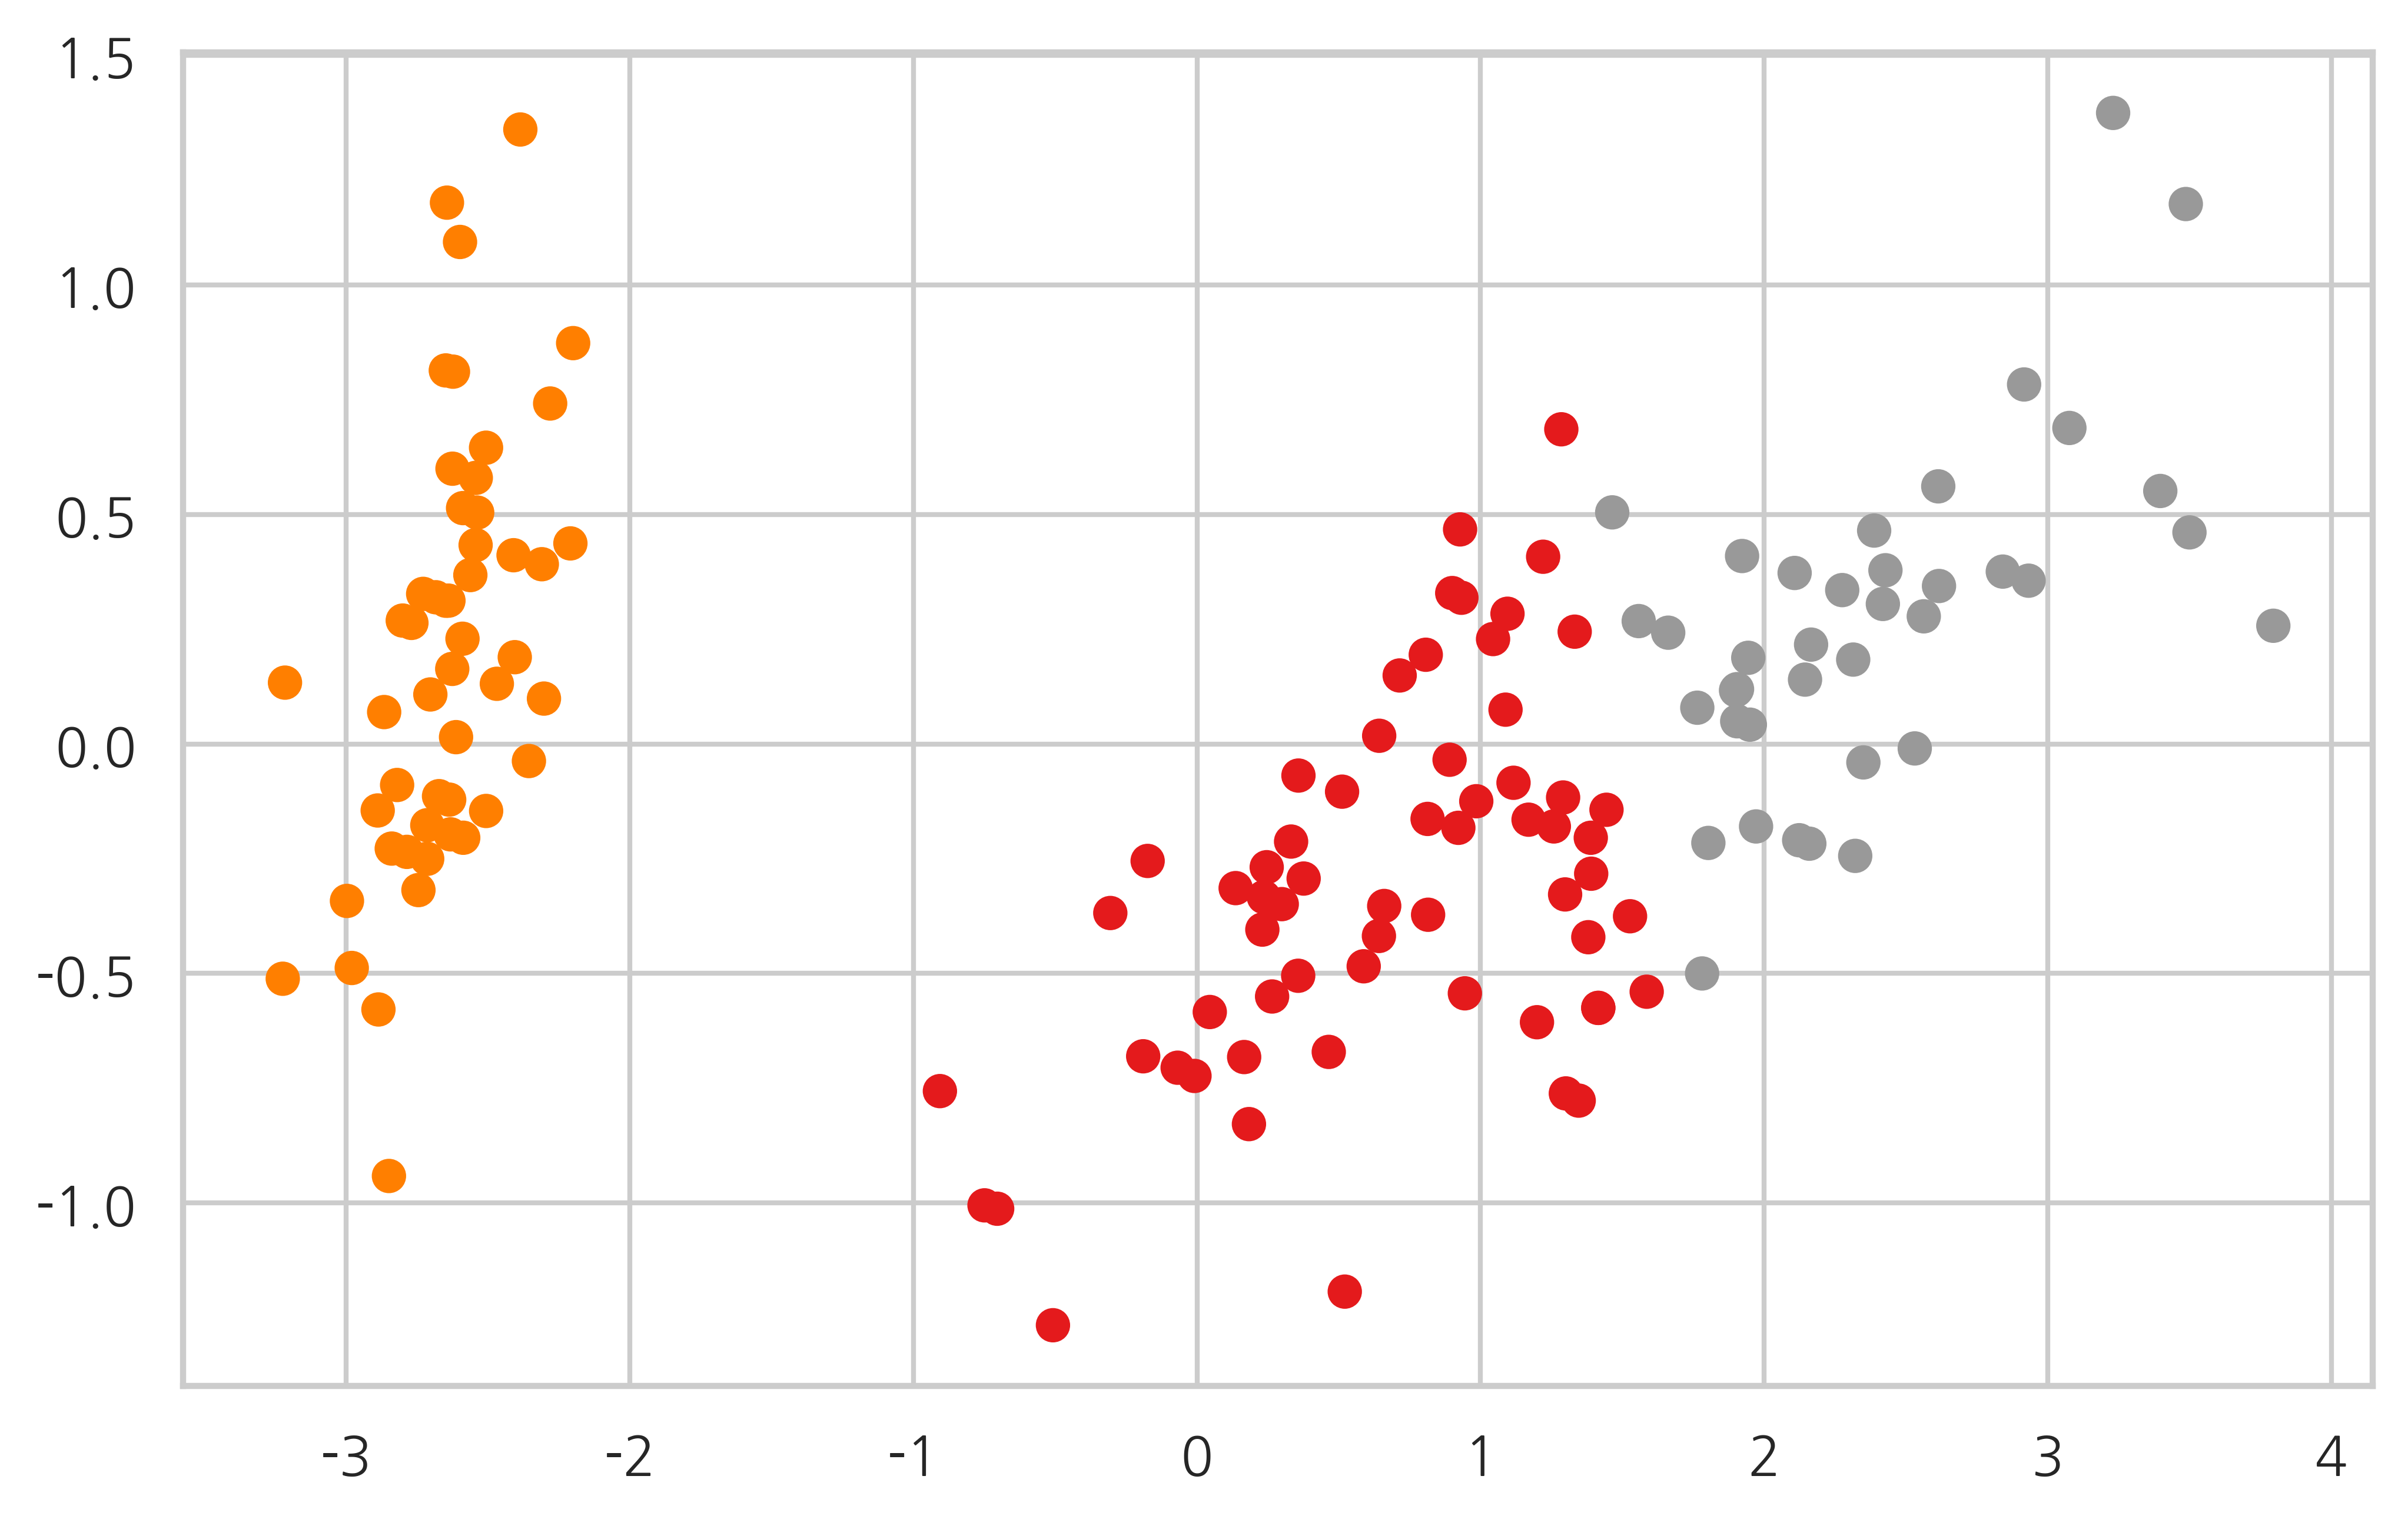

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X = pca.fit_transform(iris.data)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=plt.cm.Set1)
plt.show()

연습문제 14.3.1

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()

In [3]:
from sklearn.cluster import DBSCAN
from sklearn.metrics.cluster import adjusted_mutual_info_score, adjusted_rand_score

model = DBSCAN(eps=21.2, min_samples=4)
y_pred = model.fit_predict(digits.data)

print("ARI", adjusted_rand_score(digits.target, y_pred))
print("AMI", adjusted_mutual_info_score(digits.target, y_pred))

ARI 0.6765796324924274
AMI 0.7800205607546289


In [4]:
len(np.unique(y_pred))

17